# MTA Project 1: MTA data

In [1]:
import pandas as pd

from sqlalchemy import create_engine

engine = create_engine("sqlite:///mta_data.db")

engine.table_names()

<ipython-input-1-cafa208d3d56>:7: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['mta_data']

In [2]:
#selecting L line stations only
mta = pd.read_sql('SELECT * FROM mta_data WHERE LINENAME LIKE "%L%";', engine)
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178838 entries, 0 to 178837
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   C/A       178838 non-null  object
 1   UNIT      178838 non-null  object
 2   SCP       178838 non-null  object
 3   STATION   178838 non-null  object
 4   LINENAME  178838 non-null  object
 5   DIVISION  178838 non-null  object
 6   DATE      178838 non-null  object
 7   TIME      178838 non-null  object
 8   DESC      178838 non-null  object
 9   ENTRIES   178838 non-null  int64 
 10  EXITS     178838 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 15.0+ MB


In [3]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/21/2019,00:00:00,REGULAR,268412,816405
1,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/21/2019,04:00:00,REGULAR,268427,816425
2,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/21/2019,08:00:00,REGULAR,268433,816462
3,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/21/2019,12:00:00,REGULAR,268468,816839
4,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/21/2019,16:00:00,REGULAR,268669,817782


In [4]:
mta.STATION.unique()

array(['14 ST-UNION SQ', '8 AV', '6 AV', '3 AV', '1 AV', 'BEDFORD AV',
       'LORIMER ST', 'GRAHAM AV', 'GRAND ST', 'MONTROSE AV', 'MORGAN AV',
       'JEFFERSON ST', 'DEKALB AV', 'MYRTLE-WYCKOFF', 'HALSEY ST',
       'WILSON AV', 'BUSHWICK AV', 'ATLANTIC AV', 'SUTTER AV',
       'LIVONIA AV', 'NEW LOTS', 'EAST 105 ST', 'CANARSIE-ROCKAW',
       '14 ST', 'BROADWAY JCT', 'METROPOLITAN AV'], dtype=object)

In [5]:
#checking for missing ENTRIES values
mta[mta.ENTRIES.isna()]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS


In [6]:
mta = mta.drop('EXITS', axis=1)

In [7]:
mta['DATE'] = pd.to_datetime(mta.DATE)

In [8]:
#checking for duplicates
(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME","DATE", "TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DATE,TIME,ENTRIES
106703,H039,R375,00-00-00,NEW LOTS,L,2019-09-13,05:00:00,2
107417,H039,R375,00-00-01,NEW LOTS,L,2019-09-13,05:00:00,2
0,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,2019-08-31,01:00:00,1
119226,N078,R175,01-00-00,14 ST,ACEL,2019-12-27,16:00:00,1
119218,N078,R175,01-00-00,14 ST,ACEL,2019-12-26,08:00:00,1


In [9]:
mask1 = ((mta["C/A"] == "H039") & 
(mta["UNIT"] == "R375") & 
(mta["SCP"] == "00-00-00") & 
(mta["STATION"] == "NEW LOTS") &
(mta["DATE"] == "2019-09-13") &
(mta["TIME"] == "05:00:00"))

mta[mask1].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES
164587,H039,R375,00-00-00,NEW LOTS,L,BMT,2019-09-13,05:00:00,REGULAR,3574631
164588,H039,R375,00-00-00,NEW LOTS,L,BMT,2019-09-13,05:00:00,RECOVR AUD,3574630


In [10]:
mask2 = ((mta["C/A"] == "H039") & 
(mta["UNIT"] == "R375") & 
(mta["SCP"] == "00-00-01") & 
(mta["STATION"] == "NEW LOTS") &
(mta["DATE"] == "2019-09-13") &
(mta["TIME"] == "05:00:00"))

mta[mask2].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES
164630,H039,R375,00-00-01,NEW LOTS,L,BMT,2019-09-13,05:00:00,REGULAR,8581524
164631,H039,R375,00-00-01,NEW LOTS,L,BMT,2019-09-13,05:00:00,RECOVR AUD,8581523


In [11]:
# Get rid of the duplicate entry
mta.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"], 
                          inplace=True, ascending=False)
mta.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE", "TIME"], inplace=True)

In [12]:
#rename stations: 14 ST FLM123 and 14 ST 123FLM should be 6 AV
SIXTHBAD1 = ((mta["STATION"] == "14 ST") &
         (mta['LINENAME'] == 'FLM123'))

SIXTHBAD2 = ((mta["STATION"] == "14 ST") &
         (mta['LINENAME'] == '123FLM'))

SIXTHGOOD1 = ((mta["STATION"] == "6 AV") &
         (mta['LINENAME'] == 'FLM123'))

SIXTHGOOD2 = ((mta["STATION"] == "6 AV") &
         (mta['LINENAME'] == '123FLM'))

In [13]:
#checking number of mislabeled 14 ST entries that should be labeled 6AV
mta[SIXTHBAD2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10951 entries, 10088 to 177622
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   C/A       10951 non-null  object        
 1   UNIT      10951 non-null  object        
 2   SCP       10951 non-null  object        
 3   STATION   10951 non-null  object        
 4   LINENAME  10951 non-null  object        
 5   DIVISION  10951 non-null  object        
 6   DATE      10951 non-null  datetime64[ns]
 7   TIME      10951 non-null  object        
 8   DESC      10951 non-null  object        
 9   ENTRIES   10951 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 941.1+ KB


In [14]:
#fixing the problem by renaming the relevant stations
mta.loc[(mta['STATION'] == '14 ST') & (mta['LINENAME'] == 'FLM123'), 'STATION'] = '6 AV'
mta.loc[(mta['STATION'] == '14 ST') & (mta['LINENAME'] == '123FLM'), 'STATION'] = '6 AV'
mta[mta['STATION']=='6 AV'].LINENAME.unique()

array(['123FLM', 'FLM123'], dtype=object)

In [15]:
#checking number of mislabeled 14 ST entries that should be labeled 8 AV
EIGHTHBAD =((mta["STATION"] == "14 ST") &
         (mta['LINENAME'] == 'ACEL'))
mta[EIGHTHBAD].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9706 entries, 7738 to 175438
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   C/A       9706 non-null   object        
 1   UNIT      9706 non-null   object        
 2   SCP       9706 non-null   object        
 3   STATION   9706 non-null   object        
 4   LINENAME  9706 non-null   object        
 5   DIVISION  9706 non-null   object        
 6   DATE      9706 non-null   datetime64[ns]
 7   TIME      9706 non-null   object        
 8   DESC      9706 non-null   object        
 9   ENTRIES   9706 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 834.1+ KB


In [16]:
#checking existing 8 AV entries
mta[mta['STATION']=='8 AV'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8585 entries, 1749 to 169728
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   C/A       8585 non-null   object        
 1   UNIT      8585 non-null   object        
 2   SCP       8585 non-null   object        
 3   STATION   8585 non-null   object        
 4   LINENAME  8585 non-null   object        
 5   DIVISION  8585 non-null   object        
 6   DATE      8585 non-null   datetime64[ns]
 7   TIME      8585 non-null   object        
 8   DESC      8585 non-null   object        
 9   ENTRIES   8585 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 737.8+ KB


In [17]:
#fixing the problem by renaming the relevant stations
mta.loc[(mta['STATION'] == '14 ST') & (mta['LINENAME'] == 'ACEL'), 'STATION'] = '8 AV'

mta[mta['STATION']=='8 AV'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18291 entries, 7738 to 169728
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   C/A       18291 non-null  object        
 1   UNIT      18291 non-null  object        
 2   SCP       18291 non-null  object        
 3   STATION   18291 non-null  object        
 4   LINENAME  18291 non-null  object        
 5   DIVISION  18291 non-null  object        
 6   DATE      18291 non-null  datetime64[ns]
 7   TIME      18291 non-null  object        
 8   DESC      18291 non-null  object        
 9   ENTRIES   18291 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.5+ MB


In [18]:
#also going to rename Metropolitan Av bc it's the same as Grand
mta.loc[mta['STATION'] == 'METROPOLITAN AV', 'STATION'] = 'GRAND ST'

In [19]:
mta_daily = (mta.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.max())
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A033,R170,02-00-00,14 ST-UNION SQ,2019-08-31,158970
1,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-01,159215
2,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-02,159451
3,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-03,160453
4,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-04,161519


In [20]:
#getting previous day's entries
mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-20-864e1830c0ed>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]


In [21]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A033,R170,02-00-00,14 ST-UNION SQ,2019-08-31,158970,NaT,NaN
1,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-01,159215,2019-08-31,158970.0
2,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-02,159451,2019-09-01,159215.0
3,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-03,160453,2019-09-02,159451.0
4,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-04,161519,2019-09-03,160453.0


In [22]:
#dropping the first row
mta_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [23]:
mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 1380 to 27660
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   C/A           473 non-null    object        
 1   UNIT          473 non-null    object        
 2   SCP           473 non-null    object        
 3   STATION       473 non-null    object        
 4   DATE          473 non-null    datetime64[ns]
 5   ENTRIES       473 non-null    int64         
 6   PREV_DATE     473 non-null    datetime64[ns]
 7   PREV_ENTRIES  473 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 33.3+ KB


In [24]:
#instances where the daily entries are fewer than the previous day's entries
mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1380,A034,R170,03-03-00,14 ST-UNION SQ,2019-11-10,1317,2019-11-09,3.846968e+06
4880,H003,R163,01-00-02,6 AV,2019-09-01,1209547254,2019-08-31,1.209549e+09
4881,H003,R163,01-00-02,6 AV,2019-09-02,1209546256,2019-09-01,1.209547e+09
4882,H003,R163,01-00-02,6 AV,2019-09-03,1209545438,2019-09-02,1.209546e+09
4883,H003,R163,01-00-02,6 AV,2019-09-04,1209543099,2019-09-03,1.209545e+09


In [25]:
#looking at the reversed instances by station
(mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION       
A034  R170  03-03-00  14 ST-UNION SQ      1
H003  R163  01-00-02  6 AV              118
H022  R279  00-06-01  JEFFERSON ST        1
H023  R236  00-06-00  DEKALB AV         112
H038  R350  00-00-00  LIVONIA AV          1
            00-00-01  LIVONIA AV          1
N078  R175  01-00-03  8 AV              118
N511  R163  03-00-00  6 AV                1
            03-00-01  6 AV                1
R127  R105  00-00-00  6 AV              118
R128  R105  01-03-02  6 AV                1
dtype: int64

In [26]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  

mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1317 3846968.0
592693 9157505.0
198 2728768.0
379 4283290.0
1892 1060083.0
1690 5916160.0


In [27]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-01,159215,2019-08-31,158970.0,245.0
2,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-02,159451,2019-09-01,159215.0,236.0
3,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-03,160453,2019-09-02,159451.0,1002.0
4,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-04,161519,2019-09-03,160453.0,1066.0
5,A033,R170,02-00-00,14 ST-UNION SQ,2019-09-05,162678,2019-09-04,161519.0,1159.0


In [28]:
station_daily = mta_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,2019-09-01,4282.0
1,1 AV,2019-09-02,3733.0
2,1 AV,2019-09-03,14574.0
3,1 AV,2019-09-04,16428.0
4,1 AV,2019-09-05,18734.0


In [29]:
station_daily['MONTH'] = station_daily['DATE'].dt.month
station_daily.head()

,STATION,DATE,DAILY_ENTRIES,MONTH
0,1 AV,2019-09-01,4282.0,9
1,1 AV,2019-09-02,3733.0,9
2,1 AV,2019-09-03,14574.0,9
3,1 AV,2019-09-04,16428.0,9
4,1 AV,2019-09-05,18734.0,9


In [30]:
station_monthly = station_daily.groupby(['STATION','MONTH'])[['DAILY_ENTRIES']].sum().reset_index()
station_monthly.head()

,STATION,MONTH,DAILY_ENTRIES
0,1 AV,9,407409.0
1,1 AV,10,474826.0
2,1 AV,11,421862.0
3,1 AV,12,371697.0
4,14 ST-UNION SQ,9,2693848.0


In [31]:
station_monthly.rename(columns={'DAILY_ENTRIES': 'MONTHLY_ENTRIES'}, inplace=True)
station_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          96 non-null     object 
 1   MONTH            96 non-null     int64  
 2   MONTHLY_ENTRIES  96 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [32]:
#renaming some stations so they look better
station_monthly.loc[station_monthly['STATION']=='14 ST-UNION SQ', 'STATION'] = 'UNION SQUARE'
station_monthly.loc[station_monthly['STATION']=='CANARSIE-ROCKAW', 'STATION'] = 'CANARSIE'
station_monthly.loc[station_monthly['STATION']=='NEW LOTS', 'STATION'] = 'NEW LOTS AV'
station_monthly.loc[station_monthly['STATION']=='MYRTLE-WYCKOFF', 'STATION'] = 'MYRTLE AV'
station_monthly.loc[station_monthly['STATION']=='1 AV', 'STATION'] = '1ST AV'
station_monthly.loc[station_monthly['STATION']=='8 AV', 'STATION'] = '8TH AV'
station_monthly.loc[station_monthly['STATION']=='3 AV', 'STATION'] = '3RD AV'
station_monthly.loc[station_monthly['STATION']=='6 AV', 'STATION'] = '6TH AV'
station_monthly.loc[station_monthly['STATION']=='EAST 105 ST', 'STATION'] = 'EAST 105TH ST'

In [33]:
L_stations = [
    '8th Av',
    '6th Av',
    'Union Square',
    '3rd Av',
    '1st Av',
    'Bedford Av',
    'Lorimer St', 
    'Graham Av', 
    'Grand St',
    'Montrose Av',
    'Morgan Av',
    'Jefferson St',
    'DeKalb Av',
    'Myrtle Av',
    'Halsey St',
    'Wilson Av',
    'Bushwick Av',
    'Broadway Jct',
    'Atlantic Av',
    'Sutter Av',
    'Livonia Av',
    'New Lots Av',
    'East 105th St',
    'Canarsie']

station_order = [x.upper() for x in L_stations]

In [34]:
station_monthly.sort_values('STATION', inplace=True)
station_monthly.head()

,STATION,MONTH,MONTHLY_ENTRIES
0,1ST AV,9,407409.0
1,1ST AV,10,474826.0
2,1ST AV,11,421862.0
3,1ST AV,12,371697.0
11,3RD AV,12,129941.0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '1ST AV'),
  Text(1, 0, '3RD AV'),
  Text(2, 0, '6TH AV'),
  Text(3, 0, '8TH AV'),
  Text(4, 0, 'ATLANTIC AV'),
  Text(5, 0, 'BEDFORD AV'),
  Text(6, 0, 'BROADWAY JCT'),
  Text(7, 0, 'BUSHWICK AV'),
  Text(8, 0, 'CANARSIE'),
  Text(9, 0, 'DEKALB AV'),
  Text(10, 0, 'EAST 105TH ST'),
  Text(11, 0, 'GRAHAM AV'),
  Text(12, 0, 'GRAND ST'),
  Text(13, 0, 'HALSEY ST'),
  Text(14, 0, 'JEFFERSON ST'),
  Text(15, 0, 'LIVONIA AV'),
  Text(16, 0, 'LORIMER ST'),
  Text(17, 0, 'MONTROSE AV'),
  Text(18, 0, 'MORGAN AV'),
  Text(19, 0, 'MYRTLE AV'),
  Text(20, 0, 'NEW LOTS AV'),
  Text(21, 0, 'SUTTER AV'),
  Text(22, 0, 'UNION SQUARE'),
  Text(23, 0, 'WILSON AV')])

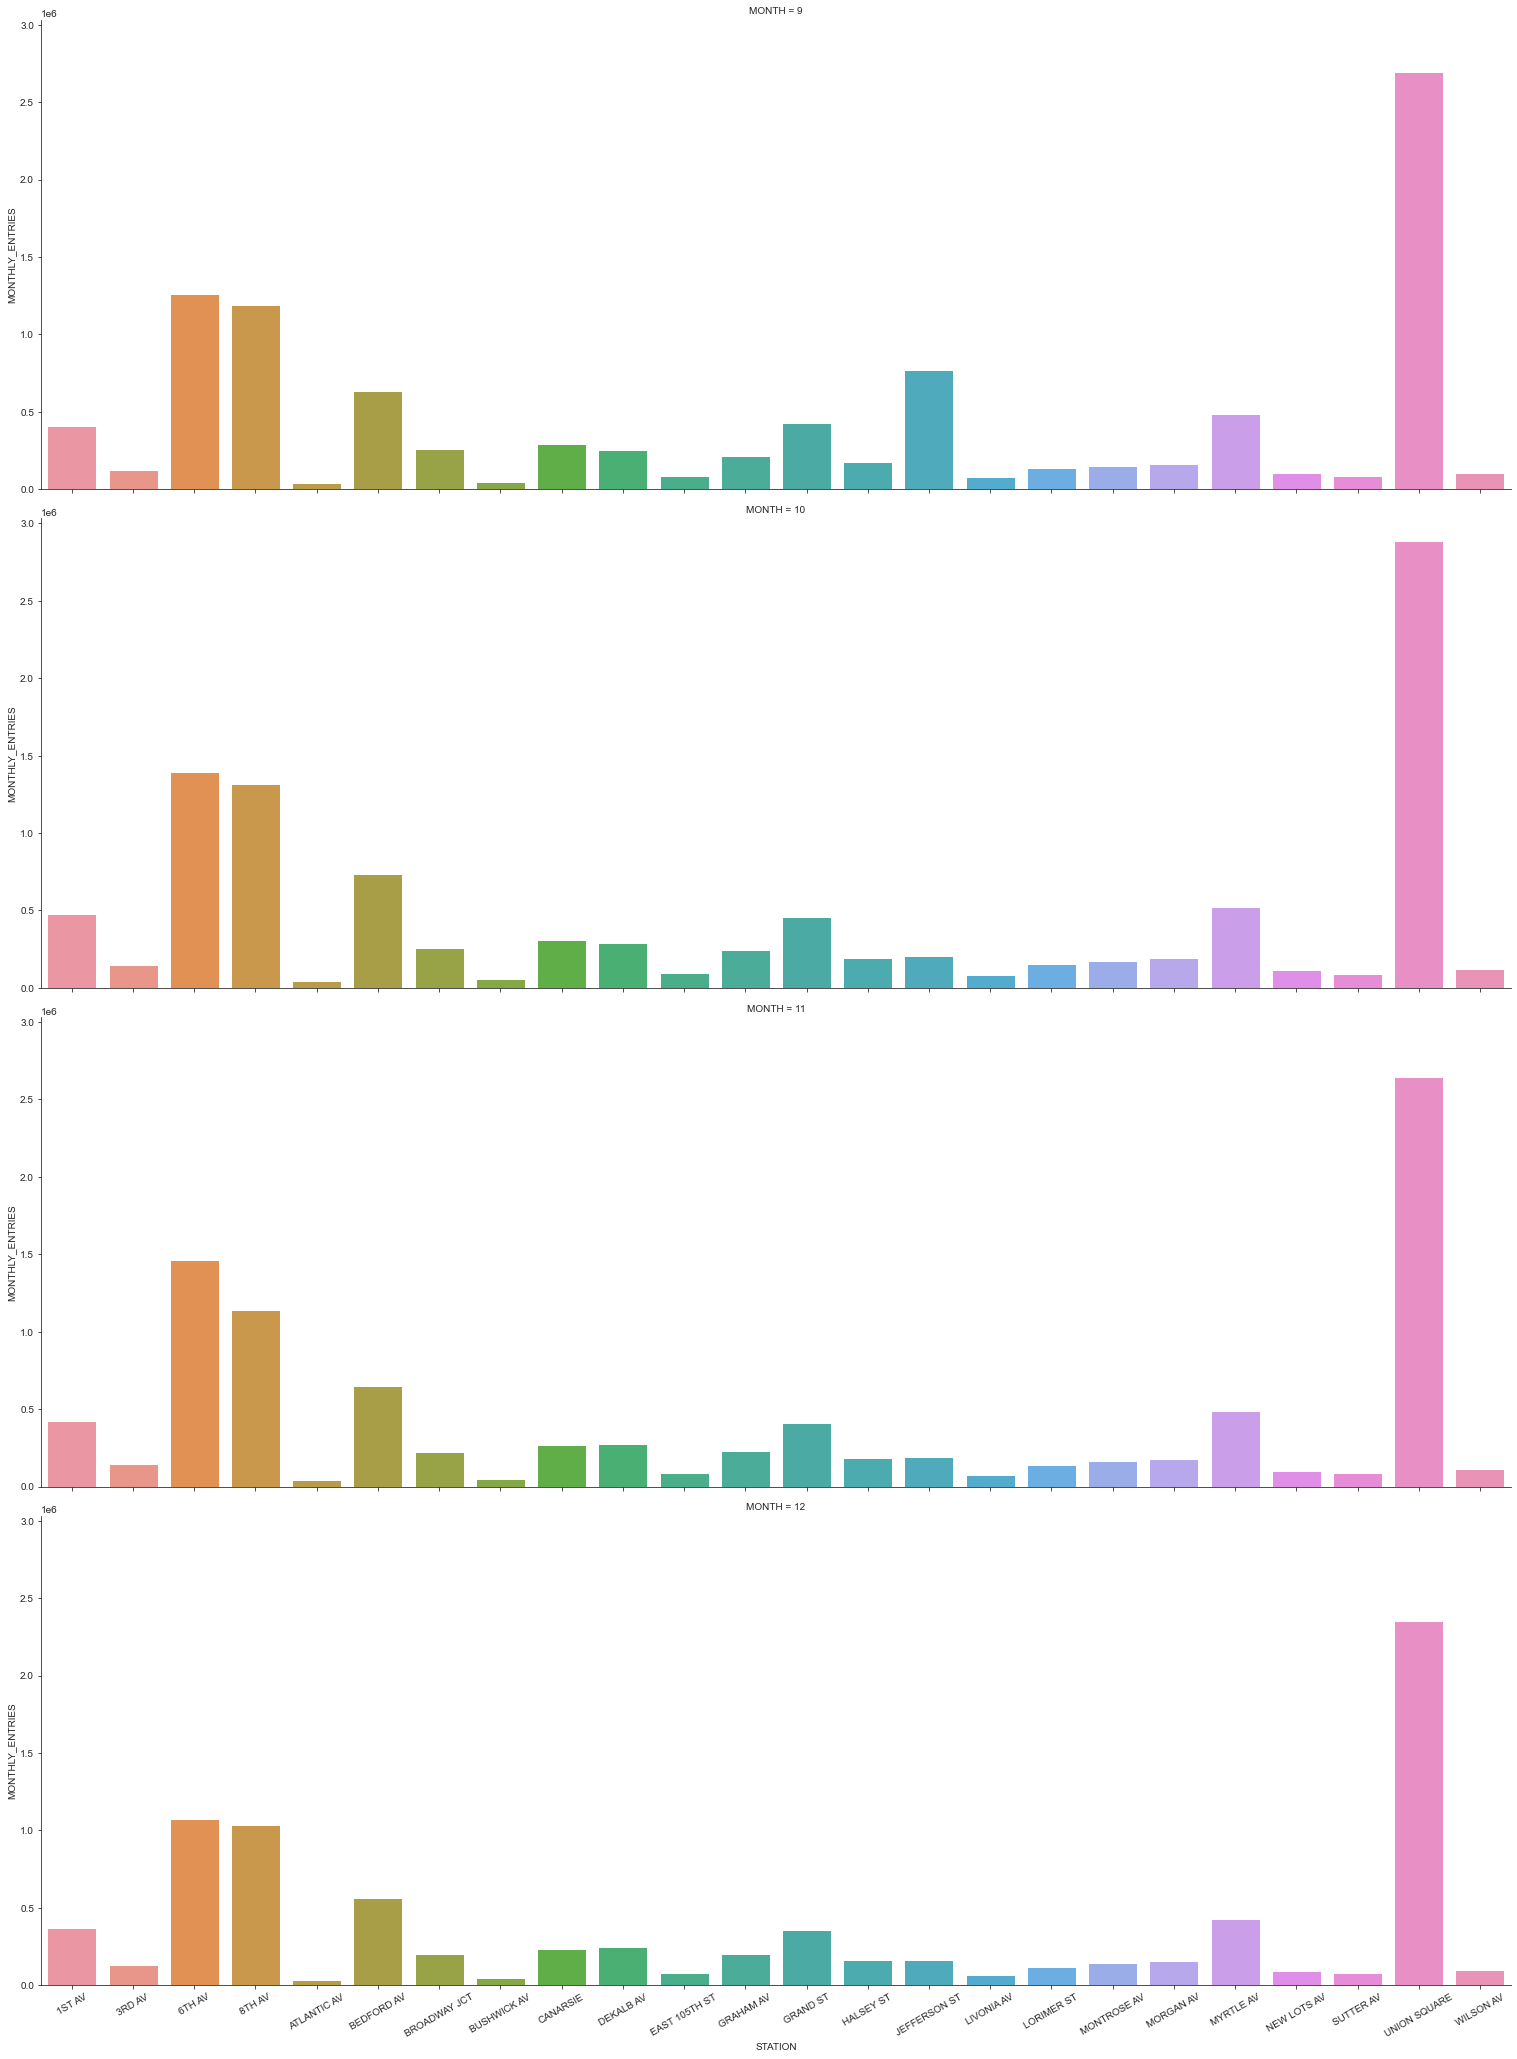

In [36]:
sns.set_style('ticks')
mta_graph = sns.catplot(
    x='STATION', 
    y='MONTHLY_ENTRIES',
    row='MONTH',
    data=station_monthly, 
    kind='bar',
    height = 7,
    aspect = 3);
plt.xticks(rotation=30)

In [37]:
#the graphs don't look very different by month, so might as well put them together
station_q4 = station_monthly.groupby('STATION').MONTHLY_ENTRIES.sum().reset_index()
station_q4.head()

,STATION,MONTHLY_ENTRIES
0,1ST AV,1675794.0
1,3RD AV,548328.0
2,6TH AV,5194009.0
3,8TH AV,4681768.0
4,ATLANTIC AV,161469.0


In [38]:
#re-order stations to go from west to east
station_q4 = station_q4.set_index('STATION')
station_q4 = station_q4.reindex(station_order)
station_q4.reset_index(inplace=True)
station_q4

,STATION,MONTHLY_ENTRIES
0,8TH AV,4681768.0
1,6TH AV,5194009.0
2,UNION SQUARE,10576555.0
3,3RD AV,548328.0
4,1ST AV,1675794.0
5,BEDFORD AV,2580816.0
6,LORIMER ST,538807.0
7,GRAHAM AV,893274.0
8,GRAND ST,1653105.0
9,MONTROSE AV,632568.0


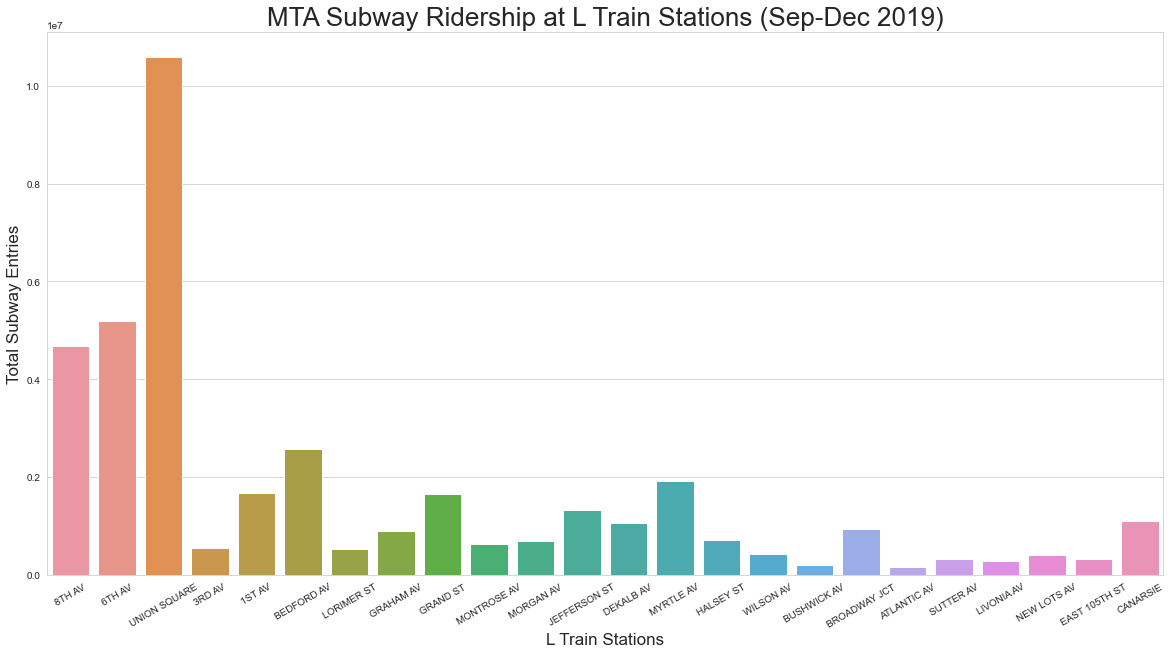

In [39]:
sns.set_style('whitegrid')
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
mta_graph_q4 = sns.barplot(x='STATION', y='MONTHLY_ENTRIES', data=station_q4, order=station_order)
plt.xticks(rotation=30)
plt.xlabel('L Train Stations', fontsize='17', horizontalalignment='center')
plt.ylabel('Total Subway Entries', fontsize='17', horizontalalignment='center')
plt.title('MTA Subway Ridership at L Train Stations (Sep-Dec 2019)', fontsize='26')
plt.savefig('mta_graph_q4.png')


In [40]:
station_q4.to_excel("MTAproject1.xlsx", sheet_name='ridership')

In [41]:
station_q4.head()

,STATION,MONTHLY_ENTRIES
0,8TH AV,4681768.0
1,6TH AV,5194009.0
2,UNION SQUARE,10576555.0
3,3RD AV,548328.0
4,1ST AV,1675794.0
